In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for visualizations
from datetime import datetime
import math
import statistics


#key = 02ef7beebd1a47e599e678e0401d5bc3
API_KEY = "02ef7beebd1a47e599e678e0401d5bc3"

BASE_URL = "https://api-v3.mbta.com/"

baseParams = {"api_key": API_KEY}


#Required endpoints: /predictions, /routes, /stops, and optionally /alerts


#find the stop IDs for the 57

stopNameList = []
stopIDList = []

def getStop():
  """
  WRITTEN BY STEPHEN

  Creates a dictionary that stores the Name of the 57 bus stop and the corresponding stop ID.

  Args: none
  Returns: nameIDDict - dictionary with the keys as the name of the stop and the values as the stop ID

  """
  stopUrl = f"{BASE_URL}stops" #gets the end point for stops to be accessed
  params = {**baseParams, "filter[route]":"57"} #stars used to merge the two dictionaries

  stopResponse = requests.get(stopUrl, params=params)
  if stopResponse.status_code == 200: #this line always checks to ensure that the API request succeeded
    data = stopResponse.json()

    for stop in data["data"]:
      stopName = stop["attributes"]["name"]
      stopNameList.append(stopName) #gets the name of each stop on the 57 route and adds them to a list

    for stop in data["data"]:
      stopID = stop["id"]
      stopIDList.append(stopID) #gets the ID for each stop and on the 57 route and adds thme to a list

    nameIDDict = dict(zip(stopNameList, stopIDList)) #combines the two lists into a dictionary where the key is the stop name and the value is the stop ID

    return nameIDDict
  else:
    print("Failure to retrieve stop data")


print(getStop())
print(stopIDList)
print(len(stopIDList))
print(len(stopNameList))

def createStopsDataFrame(stopNames, stopIDs):
  """
  WRITTEN BY: Chloe

  Creates a data frame that hold the names of all the stops with their corresponding stop IDs.

  Args: stopNames, stopIDs

  Returns: stopsDataFrame
  """

  stopsDataFrame = pd.DataFrame({
      "Stop Name" : stopNames,
      "Stop IDs" : stopIDs
  })

  return stopsDataFrame

#Real time prediction data for all stops

# NOTE: We did not create a data frame for the arrival times, as we learned later on that the arrival times did not provide helpful data
arrivalTimeList = []
def getArrivalTimePrediction(stopIDList):
  """
  WRITTEN BY STEPHEN

  Creates a list of the predicted arrival times at each stop for the 57 bus.

  Args: stopIDList - list created containing all the IDs for the 57's stops
  Returns:

  """

  for ID in stopIDList:
    stopID = ID

    arrivalUrl = f"{BASE_URL}predictions" #this gives the end point for the predictions from the API to access the stop predictions
    params = {**baseParams, "filter[stop]":stopID}
    arrivalResponse = requests.get(arrivalUrl, params=params)

    if arrivalResponse.status_code == 200:
      arrivalResponseData = arrivalResponse.json()

      stopArrivals = [] #Because some stops have more than one arrival time, I made a sublist with all times to correspond to each stop
      for item in arrivalResponseData["data"]:
        arrivalTime = item["attributes"]["arrival_time"]
        stopArrivals.append(arrivalTime)
      arrivalTimeList.append(stopArrivals) #this appends each sublist to the larger stop list containing all the stop times
    else:
      print(f"Failed to retrieve arrival data {arrivalResponse.status_code}")



departureTimeList = []
def getDepartureTimePrediction(stopIDList):
  """
  WRITTEN BY STEPHEN

  Creates a list of the predicted departure times at each stop for the 57 bus.

  Args: stopIDList - list created containing all the IDs for the 57's stops
  Returns: departureTimeList

  """

  for ID in stopIDList: #the same process that was used to create the arrival time list was repeated again to create a departure time lsit
    stopID = ID

    departureUrl = f"{BASE_URL}predictions"
    params = {**baseParams, "filter[stop]":stopID}
    departureResponse = requests.get(departureUrl, params=params)

    if departureResponse.status_code == 200:
      departureResponseData = departureResponse.json()

      stopDepartures = []
      for item in departureResponseData["data"]:
        departureTime = item["attributes"]["departure_time"]
        stopDepartures.append(departureTime)
      departureTimeList.append(stopDepartures)
    else:
      print(f"Failed to retrieve arrival data {departureResponse.status_code}")

    #return departureTimeList

def createDepartureDataFrame(stopNames, stopIDs, arrivalTimes):
  """
  WRITTEN BY: Chloe

  Creates a data frame holding stop names, id names, and arrival times. Makes data more easily acessible

  Args: stopNames, stopIDs, arrivalTimes
  Returns: departureDataFrame

  """
  departureDataFrame = pd.DataFrame({
      "Stop name" : stopNames,
      "Stop IDs" : stopIDs,
      "Departure Times" : arrivalTimes
  })

  return departureDataFrame

#print(f"the length of arrivalTimeList is {len(arrivalTimeList)}. The bus will arrive at {stopNameList[1]} at {arrivalTimeList[1]}")
#print(f"the length of departureTimeList is {len(departureTimeList)}. The bus will depart {stopNameList[1]} at {departureTimeList[1]}")


{'Technology Way @ Watertown Yard': '900', 'Galen St @ Boyd St': '902', 'Centre St @ Pearl St': '1900', 'Washington St @ Bacon St': '903', '400 Centre St - East': '9031', 'Park St @ Elmwood St': '904', 'Tremont St opp Hibbard Rd': '905', 'Tremont St @ Waverley Ave': '985', 'Tremont St @ Pembroke St': '907', 'Tremont St @ Cufflin St': '909', 'Tremont St @ Tremont Pl': '910', 'Tremont St @ Washington St': '979', 'Washington St @ Breck Ave': '913', 'Washington St @ Langley Rd': '915', 'Washington St @ Lake St': '916', 'Washington St @ Foster St': '974', 'Washington St @ Chestnut Hill Ave': '918', 'Washington St opp Waldo Terr': '919', 'Cambridge St @ Washington St': '920', 'Cambridge St opp Elko St': '19201', 'Cambridge St opp Dustin St': '922', 'Cambridge St @ Gordon St': '924', 'Cambridge St @ Barrows St': '925', 'Brighton Ave @ Cambridge St': '926', 'Brighton Ave @ Allston St': '927', 'Brighton Ave @ Harvard Ave': '928', 'Brighton Ave @ Commonwealth Ave': '931', 'Commonwealth Ave @ Bab

In [ ]:
# the inboundArrivalTimeList and outboundArrivalTimeList were not used in other parts of the code, so they were commented out.
# Although they could be useful if the MBTA data was more precise. Refer to "Challenges Encountered" in the README

#def inboundArrivalTimeList(arrivalTimeList):

  #"""WRITTEN BY: Chloe
  #Args: arrivalTimeList
  #Returns: inboundArrivalTimeList


  #inboundArrivalListLength = int(len(arrivalTimeList) / 2) # calculate number that is half of parameter list length
  #inboundArrivalTimeList = arrivalTimeList[0:inboundArrivalListLength]

  #return inboundArrivalTimeList


#def outboundArrivalTimeList(arrivalTimeList):
  #"""
  #WRITTEN BY: Chloe
  #Args: arrivalTimeList
  #Returns: outboundArrivalTimeList
   #"""
  #outboundArrivalListLength = int(len(arrivalTimeList) / 2) # calculate number that is half of parameter list length
  #outboundArrivalTimeList = arrivalTimeList[outboundArrivalListLength:]

  #return outboundArrivalTimeList

getDepartureTimePrediction(stopIDList)

arrivalTimeArray = np.array(arrivalTimeList, dtype = object)
departureTimeArray = np.array(departureTimeList, dtype = object)

def inboundDepartureTimeList(departureTimeList):
  """
  WRITTEN BY: Chloe

  Creates a list of the inbound stops, represented with sublists for each stops on the predicted departure times.
  Takes the first half of the departureTimeList stops, since those are the stops in the inbound direction.

  Args: departureTimeList
  Returns: inboundDepartureTimeList
  """

  inboundDepartureListLength = int(len(departureTimeList) / 2) # calculate number that is half of parameter list length
  inboundDepartureTimeList = departureTimeList[0:inboundDepartureListLength]

  return inboundDepartureTimeList

def outboundDepartureTimeList(departureTimeList):
  """
  WRITTEN BY: Chloe

  Creates a list of the outbound stops, represented with sublists for each stop on the predicted departure time.
  Takes the second half of the departureTimeList, since those are the stops for the bus in the outbound direction.

  Args: departureTimeList
  Returns: outboundDepartureTimeList
  """

  outboundDepartureListLength = int(len(departureTimeList) / 2) # calculate number that is half of parameter list length
  outboundDepartureTimeList = departureTimeList[outboundDepartureListLength:]

  return outboundDepartureTimeList

#print(outboundDepartureTimeList(departureTimeList))

def createInboundData():
  """
  WRITTEN BY: Chloe

  Creates a dictionary that associates the names of the inbound stops with each list of departure times

  Args: None
  Returns: inboundData
  """
  num = len(stopNameList) // 2

  inboundNames = stopNameList[0:num] # slice will get first half of the list that contains all stop names

  inboundData = dict(zip(inboundNames, inboundDepartureTimeList(departureTimeList))) # zip combines 2 lists into a dictionary
  return inboundData

inboundData = createInboundData()

def createOutboundData():
  """
  WRITTEN BY: Chloe

  Creates a dictionary that associates the names of the outbound stops with each list of departure times

  Args: None
  Returns: outboundData
  """

  num = len(stopNameList) // 2
  outboundNames = stopNameList[num:] # slice will get second half of the list that contains all stop names

  outboundData = dict(zip(outboundNames, outboundDepartureTimeList(departureTimeList))) # zip combines 2 lists into a dictionary
  return outboundData
#print(createInboundData())

outboundData = createOutboundData()

def inboundAverageWaitTime():
  """
  WRITTEN BY: Chloe

  Args: None

  Calculates average wait time in seconds for each stop. Calculates the difference between departure times for each stops, and averages that.

  Returns: inboundAverageWaitTimeDict --> A dictionary with the name of the stop as the key and the average wait time in seconds as the value.
  """

  averageWaitList = []

  for stop, times in inboundData.items(): # goes through each stop
    cleanTimeList = [] #new empty list for each iteration

    for time in times: # this loop makes a list of all the times for a certain stop, changing the format to something workable with the datetime module
      if time is not None:
        cleanTime = datetime.strptime(time[11:19], "%H:%M:%S") # clean the time, aka get it in a format that is just hour:minute:second
        cleanTimeList.append(cleanTime)
    #print(cleanTimeList)

    if len(cleanTimeList) >= 2: # length must be great than 2, in order to get the time between departures, which is what we defined as wait time
      cleanTimesArr = np.array(cleanTimeList, dtype = 'datetime64[s]') # numpy date array
      waitTimes = abs(np.diff(cleanTimesArr).astype(float) / 60) # use np.diff to calculate difference between arrival times

      #print(waitTime)s

    averageWait = (float(np.mean(waitTimes)))  # cast numpy mean into float
    averageWaitList.append(averageWait)

  #print("Average wait list:" , averageWaitList)

  inboundAverageWaitTimeDict = dict(zip(inboundData.keys(), averageWaitList)) # new dictionary that contains the name of each stop as the key, and the average wait time at each stop as the value
  return inboundAverageWaitTimeDict, averageWaitList

#print(inboundAverageWaitTime())


def outboundAverageWaitTime():
  """
  WRITTEN BY: Chloe

  Args: None

  Calculates average wait time in seconds for each stop. Calculates the difference between departure times for each stops, and averages that.

  Returns: outboundAverageWaitTimeDict --> A dictionary with the name of the stop as the key and the average wait time in seconds as the value.
  NOTE: Value in outboundAverWaitTimeDict will be 0 if there is less than 2 predicted departures
  """

  averageWaitList = []

  for stop, times in outboundData.items(): # goes through each stop
    cleanTimeList = [] # this should be a new, empty list for each iteration

    for time in times:
      if time is not None: # sometimes in the data, the next departure
        cleanTime = datetime.strptime(time[11:19], "%H:%M:%S") # clean the time, aka get it in a format that is just hour:minute:second
        cleanTimeList.append(cleanTime)
    #print(cleanTimeList)

    if len(cleanTimeList) >= 2: # length must be great than 2, in order to get the time between departures, which is what we defined as wait time
      cleanTimesArr = np.array(cleanTimeList, dtype = 'datetime64[s]') # numpy date array
      waitTimes = abs(np.diff(cleanTimesArr).astype(float) / 60) # use np.diff to calculate difference between arrival times

    averageWait = (float(np.mean(waitTimes)))

    averageWaitList.append(averageWait)


  #print("Average wait list:" , averageWaitList)

  outboundAverageWaitTimeDict = dict(zip(outboundData.keys(), averageWaitList))
  return outboundAverageWaitTimeDict, averageWaitList


print(inboundAverageWaitTime())
print(outboundAverageWaitTime())


({'Technology Way @ Watertown Yard': 29.76111111111111, 'Galen St @ Boyd St': 15.927777777777777, 'Centre St @ Pearl St': 15.877777777777778, 'Washington St @ Bacon St': 15.744444444444445, '400 Centre St - East': 15.62777777777778, 'Park St @ Elmwood St': 15.644444444444446, 'Tremont St opp Hibbard Rd': 15.6, 'Tremont St @ Waverley Ave': 15.611111111111112, 'Tremont St @ Pembroke St': 15.555555555555557, 'Tremont St @ Cufflin St': 15.466666666666669, 'Tremont St @ Tremont Pl': 15.466666666666667, 'Tremont St @ Washington St': 15.541666666666668, 'Washington St @ Breck Ave': 15.470833333333333, 'Washington St @ Langley Rd': 15.529166666666665, 'Washington St @ Lake St': 15.599999999999998, 'Washington St @ Foster St': 15.470833333333335, 'Washington St @ Chestnut Hill Ave': 15.458333333333332, 'Washington St opp Waldo Terr': 15.525, 'Cambridge St @ Washington St': 14.1, 'Cambridge St opp Elko St': 14.063333333333333, 'Cambridge St opp Dustin St': 14.096666666666668, 'Cambridge St @ Gor

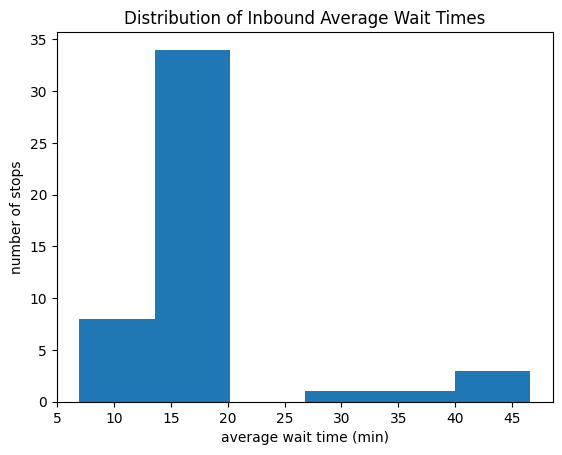

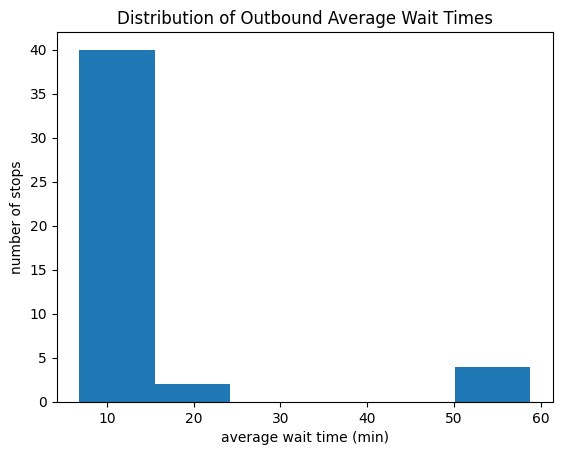

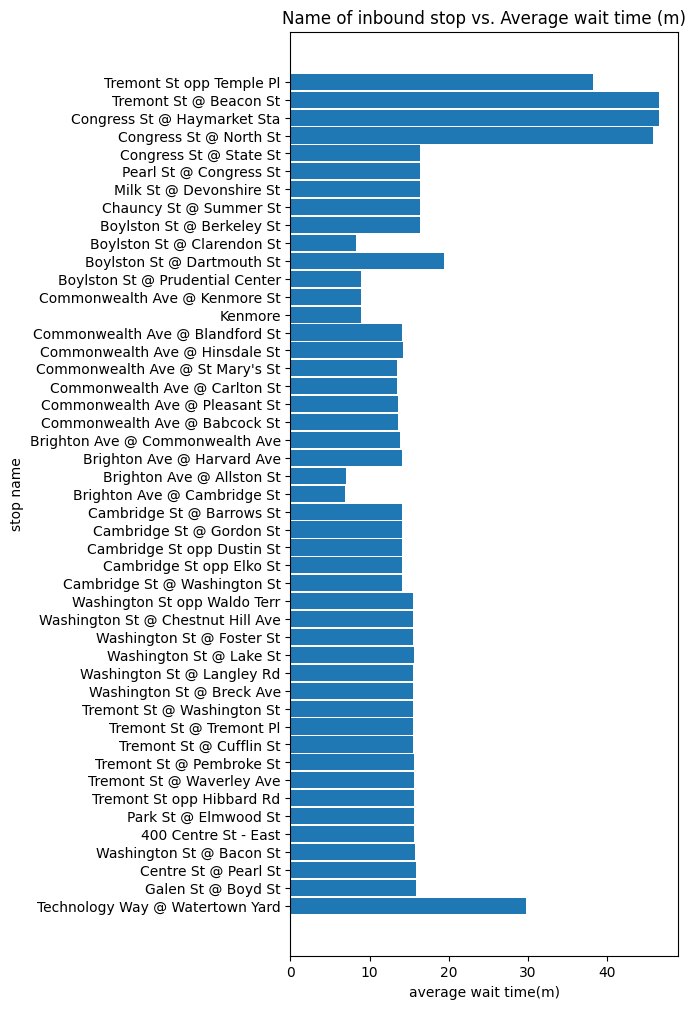

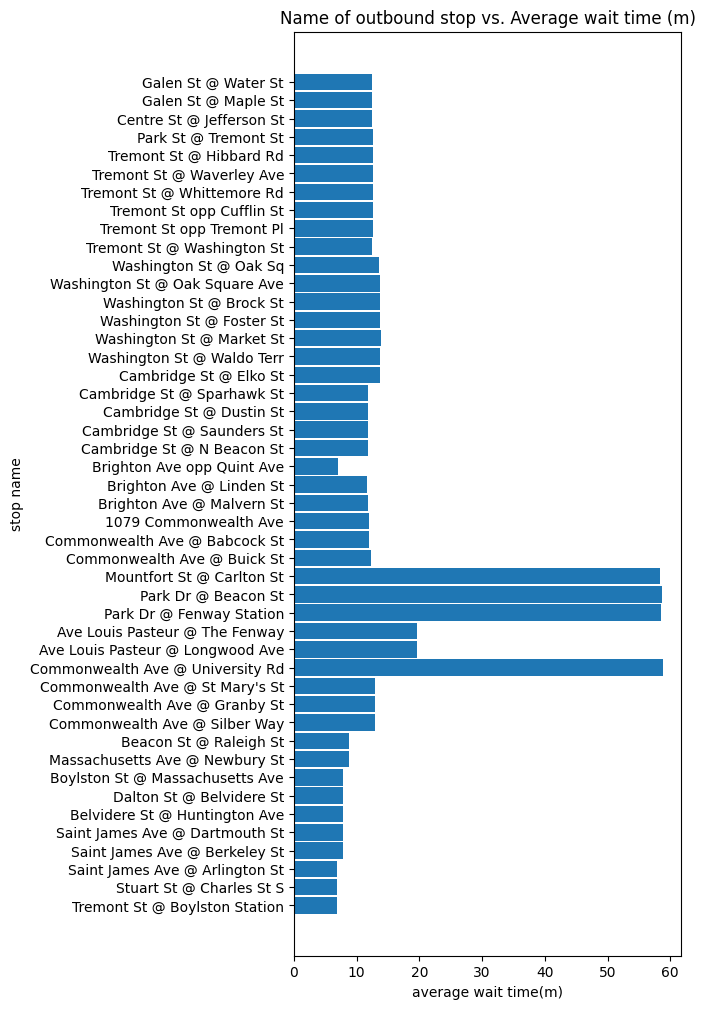

Mean wait time across all inbound stops (minutes): 17.097629266673653
Mean wait time across all outbound stops (minutes): 15.765787455298325
Median wait time across all inbound stops (minutes): 15.470833333333335
Median wait time across all outbound stops (minutes): 12.508333333333333
Standard deviation for wait times among inbound stops (minutes): 9.037623054932359
Standard deviation for wait times among outbound stops (minutes): 13.514047191227448

Statistics Table on Wait Times Across Inbound vs. Outbound Stops in Minutes
                Mean     Median  Standard Deviation
Inbound   17.097629  15.470833            9.037623
Outbound  15.765787  12.508333           13.514047


In [ ]:
def binNum(avgList):
  """
  written by: Abigail

  this function returns the square root of the length of a list. this number is the
  amount of bins that should be inputted to a histogram the length of the list given

  Args: avgList-- the list of wait times for either the inbound or outbound routes

  returns: binNum - the number of bins required for the histogram of a list of a given lengh
  """
  binNum = int(math.sqrt(len(avgList)))
  return binNum


def inboundAvgWaitHist():
  """
  written by: Abigail
  this function makes a histogram of the data of the average wait times
  for the inbound route.
  Args:none
  returns: non
  """
  inboundAvgList = inboundAverageWaitTime()[1] #acess the list of avgs
  plt.hist(inboundAvgList, bins = binNum(inboundAvgList))
  plt.xlabel("average wait time (min)")
  plt.ylabel("number of stops")
  plt.title("Distribution of Inbound Average Wait Times")
  plt.show()
inboundAvgWaitHist()

def outboundAvgWaitHist():
  """
  written by: Abigail
  this function makes a histogram of the data of the average wait times
  for the outbound route.
  Args:none
  returns: none
  """
  outboundAvgList = outboundAverageWaitTime()[1]
  plt.hist(outboundAvgList, bins = binNum(outboundAvgList))
  plt.xlabel("average wait time (min)")
  plt.ylabel("number of stops")
  plt.title("Distribution of Outbound Average Wait Times")
  plt.show()

outboundAvgWaitHist()

#identify the buisest stations (ones with the most frequent service)
#Compare wait times in different directions (kenmore vs watertown yards)

def inboundAvgWaitBar():
  """
  written by: Abigail
  shows the inbound average wait times
  in a bar graph
  Args: none
  returns: none
  """
  plt.figure(figsize = (5, 12)) # width 5, height 12
  inboundAvgDict = inboundAverageWaitTime()[0]
  plt.barh(inboundAvgDict.keys(), inboundAvgDict.values(), height = 0.9) # make graph
  plt.xlabel("average wait time(m)")
  plt.ylabel("stop name")
  plt.title("Name of inbound stop vs. Average wait time (m)")
  plt.show()
inboundAvgWaitBar()

def outboundAvgWaitBar():
  """
  written by: Abigail
  shows the outbound average wait times
  in a bar graph
  Args: none
  returns: none
  """
  plt.figure(figsize = (5, 12)) # width 5, height 12
  outboundAvgDict = outboundAverageWaitTime()[0]
  plt.barh(outboundAvgDict.keys(), outboundAvgDict.values(), height = 0.9)
  plt.xlabel("average wait time(m)")
  plt.ylabel("stop name")
  plt.title("Name of outbound stop vs. Average wait time (m)")
  plt.show()
outboundAvgWaitBar()

#calculate mean, median, standard devation of wait times
def inboundmean():
  """
  written by: Abigail
  calculates and returns the inbound
  mean from the inbound average wait time in minutes
  in minutes
  Args: none
  returns: inboundMeanMinutes - mean in minutes
  """
  inboundMeanMinutes = (statistics.mean(inboundAverageWaitTime()[1]))
  return inboundMeanMinutes
print("Mean wait time across all inbound stops (minutes): "+str(inboundmean()))

def outboundmean():
  """
  written by: Abigail
  calculates and returns the outbound
  mean from the outbound average wait time in minutes
  in minutes
  Args: none
  returns: outboundMeanMinutes - mean in minutes
  """
  outboundMeanMinutes = (statistics.mean(outboundAverageWaitTime()[1]))
  return outboundMeanMinutes
print("Mean wait time across all outbound stops (minutes): "+str(outboundmean()))

def inboundmedian():
  """
  written by: Abigail
  calculates and returns the inbound
  median from the inbound average wait time in minutes
  in minutes
  Args: none
  returns: inboundMedianMinutes- median in minutes
  """
  inboundMedianMinutes = (statistics.median(inboundAverageWaitTime()[1]))
  return inboundMedianMinutes
print("Median wait time across all inbound stops (minutes): "+str(inboundmedian()))

def outboundmedian():
  """
  written by: Abigail
  calculates and returns the outbound
  median from the outbound average wait time in minutes
  in minutes
  Args: none
  returns: outboundMedianMinutes- median in minutes
  """
  outboundMedianMinutes = (statistics.median(outboundAverageWaitTime()[1]))
  return outboundMedianMinutes
print("Median wait time across all outbound stops (minutes): "+str(outboundmedian()))

def inboundstd():
  """
  written by: Abigail
  calculates and returns the inbound
  standard deviation from the inbound average wait time in minutes
  in minutes
  Args: none
  returns: inboundStdMinutes- standard deviation in minutes
  """
  inboundStdMinutes = (np.std(inboundAverageWaitTime()[1]))
  return inboundStdMinutes
print("Standard deviation for wait times among inbound stops (minutes): "+str(inboundstd()))

def outboundstd():
  """
  written by: Abigail
  calculates and returns the outbound
  standard deviation from the outbound average wait time in minutes
  in minutes
  Args: none
  returns: outboundStdMinutes- standard deviation in minutes
  """
  outboundStdMinutes = (np.std(outboundAverageWaitTime()[1]))
  return outboundStdMinutes
print("Standard deviation for wait times among outbound stops (minutes): "+str(outboundstd()))

inboundMeanWaitTime = inboundmean()
outboundMeanWaitTime = outboundmean()
outboundMedianWaitTime = outboundmedian()
inboundMedianWaitTime = inboundmedian()
inboundStanDev = inboundstd()
outboundStanDev = outboundstd()


def createPrintStatsTable():
  """WRITTEN BY: Chloe
  Creates a table that has mean, median, and standard deviation for average wait times. holds inbound values in first row and outbound values in second row.
  Args: None
  Returns: prints table with title
  """
  statsTable = pd.DataFrame({
      "Mean" : [inboundMeanWaitTime, outboundMeanWaitTime],
      "Median" : [inboundMedianWaitTime, outboundMedianWaitTime],
      "Standard Deviation" : [inboundStanDev, outboundStanDev]
      },
      index = (["Inbound" , "Outbound"])
  )

  print("\nStatistics Table on Wait Times Across Inbound vs. Outbound Stops in Minutes\n", statsTable,)

createPrintStatsTable()

